In [1]:
pip install spotipy --upgrade

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials 
from spotipy.oauth2 import SpotifyOAuth
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plot
import seaborn as sns

In [3]:
cid = "cc6e113fb6394d5388c7cac66f15707e"

In [4]:
secret = "af9c1f2b688f4fcbbf0cc3a4717cfe91" 

In [5]:
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [6]:

import timeit
start = timeit.default_timer()


artist_name = []
track_name = []
popularity = []
track_id = []

for year in range(2000,2023):
    for i in range(0,1000,50):
        track_results = sp.search(q='year', type='track', limit=50,offset=i)
        for i, t in enumerate(track_results['tracks']['items']):
            artist_name.append(t['artists'][0]['name'])
            track_name.append(t['name'])
            track_id.append(t['id'])
            popularity.append(t['popularity'])
      

stop = timeit.default_timer()
print ('Time to run this code (in seconds):', stop - start)

Time to run this code (in seconds): 137.8528708379963


In [7]:
print('number of elements in the track_id list:', len(track_id))

number of elements in the track_id list: 23000


In [8]:
import pandas as pd

df_tracks = pd.DataFrame({'artist_name':artist_name,'track_name':track_name,'track_id':track_id,'popularity':popularity})
print(df_tracks.shape)
df_tracks

(23000, 4)


,artist_name,track_name,track_id,popularity
0,Jonas Brothers,Year 3000,4zP7ADsgJgHGY6VzxbNp1z,60
1,Yeat,Out thë way,6IyoLWzljeR3ldQo4KWHT6,81
2,Ghost,Year Zero,1YBf7Tq9bpcVwvnlP8YbQS,57
3,Yeat,Talk,0oO1AbL92F6329z13C2qQH,74
4,Al Stewart,Year of the Cat,7MTX3vevnm41xuEoPxWT3j,53
...,...,...,...,...
22995,Delta Sleep,Sofa Boy,72qQrFGhnnR74kOqrCSmkY,41
22996,Kylie Minogue,Spinning Around,0JcgDliDqDac8iOFFRm7tZ,43
22997,Steely Dan,Reeling In The Years,3Xe4JagghOfs9NF1xaqbb8,35
22998,Owl Meets Cat,Seven More Years,6PNdVDKQsuhEaVyhg2cbEL,32


In [9]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23000 entries, 0 to 22999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   artist_name  23000 non-null  object
 1   track_name   23000 non-null  object
 2   track_id     23000 non-null  object
 3   popularity   23000 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 718.9+ KB


In [10]:
# regrouper les entrées par nom_artiste et nom_piste et rechercher les doublons
grouped = df_tracks.groupby(['artist_name','track_name'], as_index=True).size()
grouped[grouped > 1].count()

850

In [11]:
df_tracks.drop_duplicates(subset=['artist_name','track_name'], inplace=True)

In [12]:
# doing the same grouping as before to verify the solution
grouped_after_dropping = df_tracks.groupby(['artist_name','track_name'], as_index=True).size()
grouped_after_dropping[grouped_after_dropping > 1].count()

0

In [13]:
df_tracks[df_tracks.duplicated(subset=['artist_name','track_name'],keep=False)].count()

artist_name    0
track_name     0
track_id       0
popularity     0
dtype: int64

In [14]:
df_tracks.shape

(850, 4)

In [15]:
# again measuring the time
start = timeit.default_timer()

# empty list, batchsize and the counter for None results
rows = []
batchsize = 100
None_counter = 0

for i in range(0,len(df_tracks['track_id']),batchsize):
    batch = df_tracks['track_id'][i:i+batchsize]
    feature_results = sp.audio_features(batch)
    for i, t in enumerate(feature_results):
        if t == None:
            None_counter = None_counter + 1
        else:
            rows.append(t)
            
print('Number of tracks where no audio features were available:',None_counter)

stop = timeit.default_timer()
print ('Time to run this code (in seconds):',stop - start)

Number of tracks where no audio features were available: 0
Time to run this code (in seconds): 1.5843362000014167


In [16]:
print('number of elements in the track_id list:', len(rows))

number of elements in the track_id list: 850


In [17]:
df_audio_features = pd.DataFrame.from_dict(rows,orient='columns')
print("Shape of the dataset:", df_audio_features.shape)
df_audio_features.head()

Shape of the dataset: (850, 18)


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.659,0.857,11,-5.850,1,0.0437,0.0045,0.000002,0.335,0.798,106.965,audio_features,4zP7ADsgJgHGY6VzxbNp1z,spotify:track:4zP7ADsgJgHGY6VzxbNp1z,https://api.spotify.com/v1/tracks/4zP7ADsgJgHG...,https://api.spotify.com/v1/audio-analysis/4zP7...,201960,4
1,0.767,0.628,4,-7.410,0,0.2420,0.2100,0.000009,0.275,0.798,128.070,audio_features,6IyoLWzljeR3ldQo4KWHT6,spotify:track:6IyoLWzljeR3ldQo4KWHT6,https://api.spotify.com/v1/tracks/6IyoLWzljeR3...,https://api.spotify.com/v1/audio-analysis/6Iyo...,150242,4
2,0.469,0.705,7,-5.134,1,0.0458,0.0304,0.015500,0.659,0.137,122.025,audio_features,1YBf7Tq9bpcVwvnlP8YbQS,spotify:track:1YBf7Tq9bpcVwvnlP8YbQS,https://api.spotify.com/v1/tracks/1YBf7Tq9bpcV...,https://api.spotify.com/v1/audio-analysis/1YBf...,350187,4
3,0.698,0.763,4,-4.716,0,0.2050,0.0873,0.000000,0.647,0.252,139.939,audio_features,0oO1AbL92F6329z13C2qQH,spotify:track:0oO1AbL92F6329z13C2qQH,https://api.spotify.com/v1/tracks/0oO1AbL92F63...,https://api.spotify.com/v1/audio-analysis/0oO1...,174857,4
4,0.540,0.634,4,-9.165,0,0.0346,0.0160,0.009800,0.118,0.546,116.461,audio_features,7MTX3vevnm41xuEoPxWT3j,spotify:track:7MTX3vevnm41xuEoPxWT3j,https://api.spotify.com/v1/tracks/7MTX3vevnm41...,https://api.spotify.com/v1/audio-analysis/7MTX...,400067,4


In [18]:
df_audio_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      850 non-null    float64
 1   energy            850 non-null    float64
 2   key               850 non-null    int64  
 3   loudness          850 non-null    float64
 4   mode              850 non-null    int64  
 5   speechiness       850 non-null    float64
 6   acousticness      850 non-null    float64
 7   instrumentalness  850 non-null    float64
 8   liveness          850 non-null    float64
 9   valence           850 non-null    float64
 10  tempo             850 non-null    float64
 11  type              850 non-null    object 
 12  id                850 non-null    object 
 13  uri               850 non-null    object 
 14  track_href        850 non-null    object 
 15  analysis_url      850 non-null    object 
 16  duration_ms       850 non-null    int64  
 1

In [19]:
columns_to_drop = ['analysis_url','track_href','type','uri']
df_audio_features.drop(columns_to_drop, axis=1,inplace=True)

df_audio_features.rename(columns={'id': 'track_id'}, inplace=True)

df_audio_features.shape

(850, 14)

In [20]:

df = pd.merge(df_tracks,df_audio_features,on='track_id',how='inner')
print("Shape of the dataset:", df_audio_features.shape)
df.head()

Shape of the dataset: (850, 14)


,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Jonas Brothers,Year 3000,4zP7ADsgJgHGY6VzxbNp1z,60,0.659,0.857,11,-5.850,1,0.0437,0.0045,0.000002,0.335,0.798,106.965,201960,4
1,Yeat,Out thë way,6IyoLWzljeR3ldQo4KWHT6,81,0.767,0.628,4,-7.410,0,0.2420,0.2100,0.000009,0.275,0.798,128.070,150242,4
2,Ghost,Year Zero,1YBf7Tq9bpcVwvnlP8YbQS,57,0.469,0.705,7,-5.134,1,0.0458,0.0304,0.015500,0.659,0.137,122.025,350187,4
3,Yeat,Talk,0oO1AbL92F6329z13C2qQH,74,0.698,0.763,4,-4.716,0,0.2050,0.0873,0.000000,0.647,0.252,139.939,174857,4
4,Al Stewart,Year of the Cat,7MTX3vevnm41xuEoPxWT3j,53,0.540,0.634,4,-9.165,0,0.0346,0.0160,0.009800,0.118,0.546,116.461,400067,4


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 0 to 849
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       850 non-null    object 
 1   track_name        850 non-null    object 
 2   track_id          850 non-null    object 
 3   popularity        850 non-null    int64  
 4   danceability      850 non-null    float64
 5   energy            850 non-null    float64
 6   key               850 non-null    int64  
 7   loudness          850 non-null    float64
 8   mode              850 non-null    int64  
 9   speechiness       850 non-null    float64
 10  acousticness      850 non-null    float64
 11  instrumentalness  850 non-null    float64
 12  liveness          850 non-null    float64
 13  valence           850 non-null    float64
 14  tempo             850 non-null    float64
 15  duration_ms       850 non-null    int64  
 16  time_signature    850 non-null    int64  
dt

In [22]:
df[df.duplicated(subset=['artist_name','track_name'],keep=False)]

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature


In [23]:
df.to_csv('Spotify2022.csv')

In [24]:
# create new dataframe df_top ordered consisting of the 100 most popular tracks
df_top = df.sort_values('popularity', ascending=False).head(100)


df_top[['artist_name', 'track_name', 'popularity']].head(50)

,artist_name,track_name,popularity
123,Zach Bryan,Something in the Orange,85
1,Yeat,Out thë way,81
107,Playboi Carti,Sky,79
26,Yeat,Monëy so big,77
27,Lukas Graham,7 Years,77
25,Christina Perri,A Thousand Years,77
5,Yeat,Flawlëss (feat. Lil Uzi Vert),76
3,Yeat,Talk,74
41,WEEDMANE,SUICIDE YEAR,74
65,Yeat,Sorry Bout That,73


In [25]:
# Top 20 artistes par nombres de sons
df_top[['artist_name','track_name']].groupby('artist_name').count().sort_values('track_name', ascending=False).head(20)

,track_name
artist_name,
Yeat,38
Ne-Yo,3
Christina Perri,2
Max Richter,2
The Presidents Of The United States Of America,2
Jonas Brothers,2
10 Years,1
Steve Harley,1
SALES,1


In [26]:
# top 20 artists par popularité
df_top[['artist_name','popularity']].groupby('artist_name').sum().sort_values('popularity', ascending=False).head(20)

,popularity
artist_name,
Yeat,2540
Ne-Yo,201
Christina Perri,137
Jonas Brothers,126
Max Richter,125
The Presidents Of The United States Of America,125
Zach Bryan,85
Playboi Carti,79
Lukas Graham,77


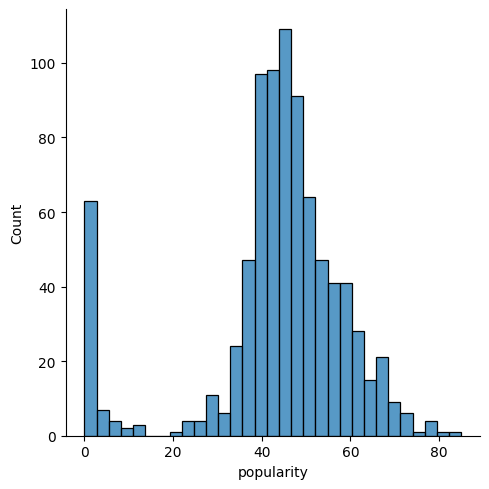

In [27]:
sns.displot(data=df, x='popularity')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=73a2d827-cb40-472a-ae56-dc40ef4b18bd' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>